In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/Users/erblinberisha/Desktop/MLProject/waveform.csv")

In [3]:
X = data.drop(columns = ["class"])
y = data["class"].values

In [4]:
#!pip install -U imbalanced-learn
from imblearn.under_sampling import RepeatedEditedNearestNeighbours 

Using TensorFlow backend.


In [5]:
rnn = RepeatedEditedNearestNeighbours(n_neighbors=10)
X_res, y_res = rnn.fit_resample(X, y)

In [6]:
X_res

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40
0,0.15,1.01,-0.18,0.68,1.61,1.83,1.66,2.22,2.90,2.80,...,0.95,-0.44,-0.09,-1.66,-1.13,0.70,-0.12,-1.96,-0.86,0.40
1,0.49,0.08,0.14,0.45,2.66,2.34,2.55,0.44,1.67,1.63,...,0.64,-0.21,1.00,0.66,0.61,-1.13,-0.16,-1.52,-1.35,-0.74
2,1.56,1.65,2.23,0.37,0.39,2.86,4.61,1.98,1.08,0.84,...,-0.17,0.02,-0.00,-0.20,0.28,0.27,-1.94,-2.53,-0.71,1.71
3,0.79,0.75,0.45,1.16,1.47,1.78,2.48,2.64,0.87,-0.03,...,-1.38,2.86,-0.83,-0.13,0.54,0.47,-1.36,-1.86,-0.77,-2.22
4,0.55,0.95,0.80,3.14,1.90,1.90,3.87,1.95,2.21,0.43,...,-0.39,-0.11,-1.19,0.39,2.06,-1.67,-0.23,0.57,-0.84,-1.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,-1.03,-1.68,0.43,-2.09,0.05,0.23,0.98,1.64,1.42,4.37,...,-0.70,-1.60,-0.20,-0.41,-1.04,-0.07,0.47,-0.14,-0.07,-0.39
2501,0.69,-1.06,-0.08,0.24,0.93,0.93,-0.45,2.71,1.50,3.02,...,-1.14,1.14,1.10,0.53,-0.14,0.96,-0.69,-0.26,1.54,-1.27
2502,-0.78,0.90,-1.62,0.92,-0.44,0.74,0.48,4.42,2.47,3.16,...,1.51,-1.07,0.90,-0.62,-0.82,-0.91,-0.61,0.59,2.35,-0.44
2503,1.40,-1.59,1.62,-0.37,0.56,2.42,0.16,2.61,3.71,3.40,...,-0.93,1.08,-0.43,0.02,0.44,-0.07,1.46,0.06,-1.19,0.12


Text(0, 0.5, 'Testing Accuracy after RNN')

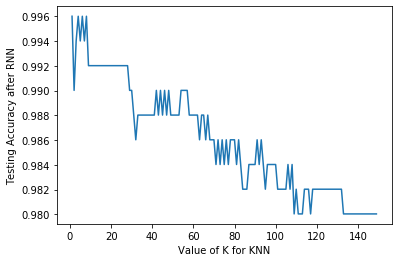

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
xTrain, xTest, yTrain, yTest = train_test_split(X_res, y_res, test_size = 0.2, random_state = 1, stratify = y_res)


k_range = range(1, 150)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xTrain, yTrain)
    y_pred = knn.predict(xTest)
    scores.append(metrics.accuracy_score(yTest, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy after RNN')

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=1, stratify = y_res)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

rknn = KNeighborsClassifier(n_neighbors=10)
rknn.fit(X_train, y_train)

y_pred = rknn.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
print("The accuracy score is {}".format(acc_score))

The accuracy score is 0.9920159680638723
